### Antibiotic Histogram Plotter

In [1]:
CC=0.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import os

if not os.path.exists("Figures"):
    os.makedirs("Figures")

In [3]:
def load_data(filedir):
    
    mydata = np.genfromtxt(filedir,delimiter="\t")
    TotalDensity = [i[0] for i in mydata] #Total bacterial density
    Suc = [i[1] for i in mydata] #Susceptible strain total density
    Res = [i[2] for i in mydata] #Resistant strain total density
    Rel_Freq = [i[2]/(i[1]+i[2]) for i in mydata] #Resistant Relative Frequency
    Suc_win = [i[3] for i in mydata] #Number of wins of Susceptible strain
    Res_win = [i[4] for i in mydata] #Number of wins of Resistant strain
    R_S_winratio = [i[4]/(i[3]+i[4]) for i in mydata]#node-to-node Resistant WinRatio
    Netdensity = [i[6] for i in mydata] #Network density
    clustc = [i[7] for i in mydata] #Network clustering coefficient
    clo_centr = [i[8] for i in mydata] #Closeness centrality
    ant_deg = [i[9] for i in mydata] #Antibiotic source connectivity
    bet_centr = [i[10] for i in mydata] #Betweeness centrality
    ant_con = [i[11] for i in mydata]
    ME = [i[12] for i in mydata]
    
    d = {'TotDen':TotalDensity,'SucDen':Suc,'ResDen':Res,'Rel_Freq':Rel_Freq,
           'SucWin':Suc_win, 'ResWin':Res_win, 'R_S_winratio':R_S_winratio,
           'NetDen':Netdensity,'ClustC':clustc,'CloCentr':clo_centr,'AntDeg':ant_deg,
           'BetCentr':bet_centr,'AntCon':ant_con,'ME':ME}
    return pd.DataFrame(d)

NamesDict = {'TotDen':'Total Bacterial Density','SucDen': 'Susceptible Bacteria Density',
             'ResDen': 'Resistant Bacteria Density','Rel_Freq': 'Resistant Relative Frequency',
       'SucWin': 'Susceptible Node Winners', 'ResWin':'Resistant Node Winners', 'R_S_winratio':'Ratio of winners R/S',
       'NetDen':'Network Density','ClustC':'Global Clustering Coefficient','CloCentr':'Closeness Centrality',
        'ant_deg':'Connectivity of Antibiotic Source',
       'BetCentr':'Betweenness Centrality','AntCon':'Antibiotic Concentration','ME':'ME'}

In [4]:
sim_MEs = [2,4,6,8,10]
sim_size = len(sim_MEs)

In [5]:
y_axis_labels = {'ResDen':'Average Bacterial Density','ResWin':'D-Score'}

In [6]:
data = [np.genfromtxt("ANT/ant_"+str(me)+"edges_watts_dist",delimiter="\t") for me in sim_MEs]
df_vec = [load_data("DR_N_50_meanedg_"+str(i)+"_watts_out") for i in sim_MEs]
for i in range(len(data)): 
    for j in range(len(data[i])):
        for k in range(len(data[i][j])):
            if data[i][j][k]<0:
                data[i][j][k] = 0  

In [7]:
def Stackplots_ANT_X(TypeofDen):
    fontsize=13
    f, ax_vec = plt.subplots(nrows=sim_size,ncols=2, sharex='col', sharey='col', figsize=(10,10))

    for i in range(sim_size):
        ax = ax_vec[i, 0]
        results, edges = np.histogram([j for j in data[i]],normed=True,range=[0,16],bins=30)
        binWidth = edges[1] - edges[0]
        ax.bar(edges[:-1], results*binWidth, binWidth,color='g',linewidth=0.3,edgecolor='black')

        line1 = ax.vlines(np.mean([j for j in data[i]]),ymin=0,ymax=1,colors=['r'],alpha=0.5)
        line2 = ax.vlines(np.median([j for j in data[i]]),ymin=0,ymax=1,colors=['b'],alpha=0.5)

        if i>0:
            ax.yaxis.get_offset_text().set_visible(False)
        
        else:
            ax.set_title("Antibiotic Distribution",y=1.06)
            
        if i==sim_size-1:
            ax.legend([line1,line2],["Median","Mean"])
            ax.set_xlabel("Antibiotic Concentration in node at $t_F$ ($A_0=500$)",fontsize=fontsize)

        ax.set_xlim([-0.05,16])
    f.text(0.05, 0.5, 'Frequency of nodes', va='center', rotation='vertical',fontsize = fontsize)

    mean_matrix = [df_vec[i].groupby(['AntCon'],as_index=False).mean() for i in range(sim_size)]
    norm_mean_matrix = [df_vec[i].groupby(['AntCon'],as_index=False).mean() for i in range(sim_size)]
    for i in range(sim_size):

        ax = ax_vec[i, 1]
        
        ax.stackplot(mean_matrix[i]['AntCon'],np.divide(mean_matrix[i][TypeofDen[0]],50),np.divide(mean_matrix[i][TypeofDen[1]],50),colors=['red','blue'])

        ax.annotate(r'$M=%d$' % sim_MEs[i], xy=(1.05,0.5), rotation=90,
                            ha='center',va='center',xycoords='axes fraction', fontsize=fontsize)
        if i>0:
            ax.yaxis.get_offset_text().set_visible(False)
            if i==sim_size-1:
                ax.legend(['Resistant','Susceptible'])
                ax.set_xlabel("Antibiotic Concentration in $N_0$ at $t_0$",fontsize=fontsize)
        else:
            ax.set_title("Dose-Response",y=1.06)
                
        f.subplots_adjust(wspace=0.25,hspace=0.1)
    f.text(0.49, 0.5, y_axis_labels[TypeofDen[0]], va='center', rotation='vertical',fontsize = fontsize)
        
    f.suptitle("Comparison of Antibiotic Distribution and Resistance Selection", fontsize=fontsize)
    plt.savefig("Figures/Comparison_ANT_Stackplot_"+y_axis_labels[TypeofDen[0]]+".png", dpi=200)
    plt.show()

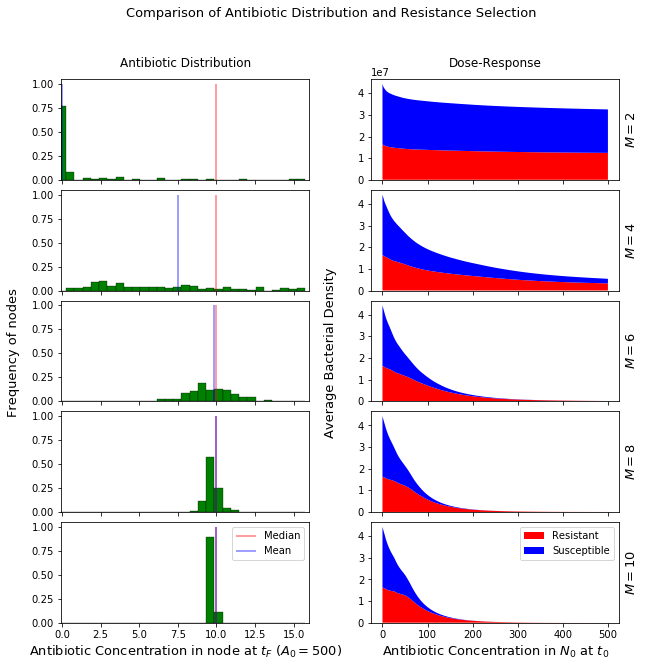

In [8]:
Stackplots_ANT_X(['ResDen','SucDen'])

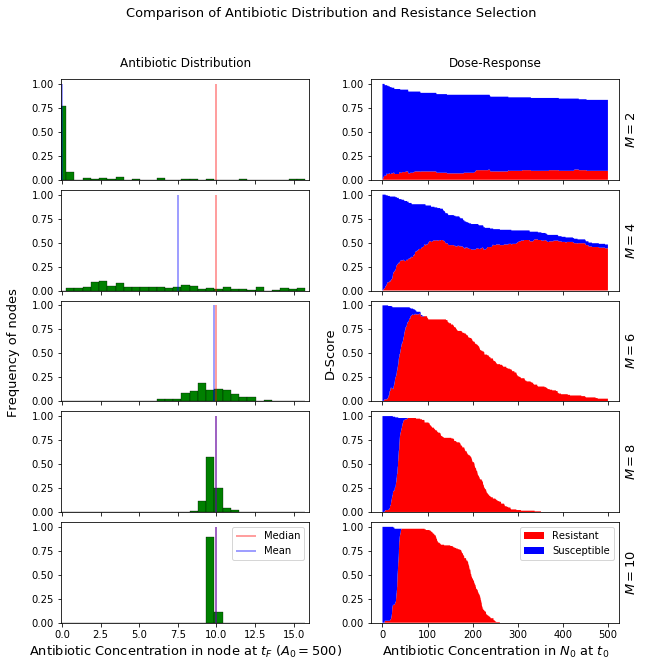

In [9]:
Stackplots_ANT_X(['ResWin','SucWin'])